# Tugas Eksplorasi dan Persiapan Data untuk Membangun Model

In [50]:
#Import Package
# import library pandas
import pandas as pd
import hvplot.pandas

# Import library numpy
import numpy as np

# Import library os
import os

# Import library matplotlib dan seaborn untuk visualisasi
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Import Module LinearRegression digunakan untuk memanggil algoritma Linear Regression.
from sklearn.linear_model import LinearRegression

# import Module train_test_split digunakan untuk membagi data kita menjadi training dan testing set.
from sklearn.model_selection import train_test_split

# import modul mean_absolute_error dari library sklearn
from sklearn.metrics import mean_absolute_error as MAE

#import math agar program dapat menggunakan semua fungsi yang ada pada modul math.(ex:sqrt)
import math

# me-non aktifkan peringatan pada python
import warnings 
warnings.filterwarnings('ignore')

In [51]:
#Import Dataset
data = pd.read_csv("Data Pertumbuhan Ekonomi Jawa Barat.csv")
data

,Kabupaten/Kota,Wilayah,Kasus Covid-19 (31 Des 2020),TPAK,TPT,Indeks Kedalaman Kemiskinan,IPM,Kategori IPM,Laju PDRB ADHK
0,Bogor,Kabupaten,4428,65.42,9.06,0.83,70.40,Tinggi,5.85
1,Sukabumi,Kabupaten,2486,62.68,7.99,0.80,66.88,Sedang,5.75
2,Cianjur,Kabupaten,209,66.14,9.72,1.38,65.36,Sedang,5.47
3,Bandung,Kabupaten,5944,65.38,5.48,0.92,72.39,Tinggi,6.09
4,Garut,Kabupaten,3893,62.70,7.28,0.97,66.12,Sedang,5.02
5,Tasikmalaya,Kabupaten,499,66.66,6.25,0.83,65.67,Sedang,5.43
6,Ciamis,Kabupaten,1415,67.56,5.10,0.92,70.49,Tinggi,5.38
7,Kuningan,Kabupaten,1936,61.31,9.61,2.41,69.38,Tinggi,6.56
8,Cirebon,Kabupaten,2844,65.38,10.28,1.30,68.75,Sedang,4.86
9,Majalengka,Kabupaten,1514,67.97,4.37,1.41,67.59,Sedang,7.14


In [52]:
#Tipe Data dari Dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Kabupaten/Kota                27 non-null     object 
 1   Wilayah                       27 non-null     object 
 2   Kasus Covid-19 (31 Des 2020)  27 non-null     int64  
 3   TPAK                          27 non-null     float64
 4   TPT                           27 non-null     float64
 5   Indeks Kedalaman Kemiskinan   27 non-null     float64
 6   IPM                           27 non-null     float64
 7   Kategori IPM                  27 non-null     object 
 8   Laju PDRB ADHK                27 non-null     float64
dtypes: float64(5), int64(1), object(3)
memory usage: 2.0+ KB


Diketahui bahwa untuk kolom:
-Kabupaten/kota, Wilayah, Kategori IPM memiliki tipe data object
-Kasus Covid-19 (31 Des 2020) memiliki tipe data int64
-TPAK, TPT, Indeks Kedalaman Kemiskinan, IPM, Laju PDRB ADHK memiliki tipe data float64

In [53]:
#Ukuran (jumlah baris dan kolom) dari data
data.shape

(27, 9)

Artinya data yang digunakan terdiri atas 27 baris dan 9 kolom

In [54]:
#Deteksi Adanya Missing Value pada Data
np.sum(data.isnull()) 

Kabupaten/Kota                  0
Wilayah                         0
Kasus Covid-19 (31 Des 2020)    0
TPAK                            0
TPT                             0
Indeks Kedalaman Kemiskinan     0
IPM                             0
Kategori IPM                    0
Laju PDRB ADHK                  0
dtype: int64

Artinya tidak terdapat missing value pada Data Pertumbuhan Ekonomi Jawa Barat Tahun 2020

In [55]:
#Statistika Deskriptif
data.describe()

,Kasus Covid-19 (31 Des 2020),TPAK,TPT,Indeks Kedalaman Kemiskinan,IPM,Laju PDRB ADHK
count,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000
mean,4202.444444,65.262963,7.794074,1.161111,71.642963,5.539259
std,5471.429755,2.771767,1.671253,0.490128,4.722253,0.966699
min,137.000000,61.310000,4.370000,0.290000,65.360000,3.200000
25%,1226.000000,63.505000,6.500000,0.815000,68.070000,5.020000
50%,2037.000000,65.380000,8.170000,1.080000,70.660000,5.490000
75%,4160.500000,66.400000,9.020000,1.390000,74.140000,6.190000
max,22256.000000,75.180000,10.280000,2.410000,81.510000,7.140000


In [56]:
#Korelasi Antar Variabel
korelasi=data.corr()
korelasi

,Kasus Covid-19 (31 Des 2020),TPAK,TPT,Indeks Kedalaman Kemiskinan,IPM,Laju PDRB ADHK
Kasus Covid-19 (31 Des 2020),1.000000,-0.134081,0.006523,-0.548339,0.692421,0.102631
TPAK,-0.134081,1.000000,-0.581015,-0.056025,-0.174060,-0.058735
TPT,0.006523,-0.581015,1.000000,0.218299,0.053172,-0.356613
Indeks Kedalaman Kemiskinan,-0.548339,-0.056025,0.218299,1.000000,-0.450951,-0.123937
IPM,0.692421,-0.174060,0.053172,-0.450951,1.000000,0.376659
Laju PDRB ADHK,0.102631,-0.058735,-0.356613,-0.123937,0.376659,1.000000


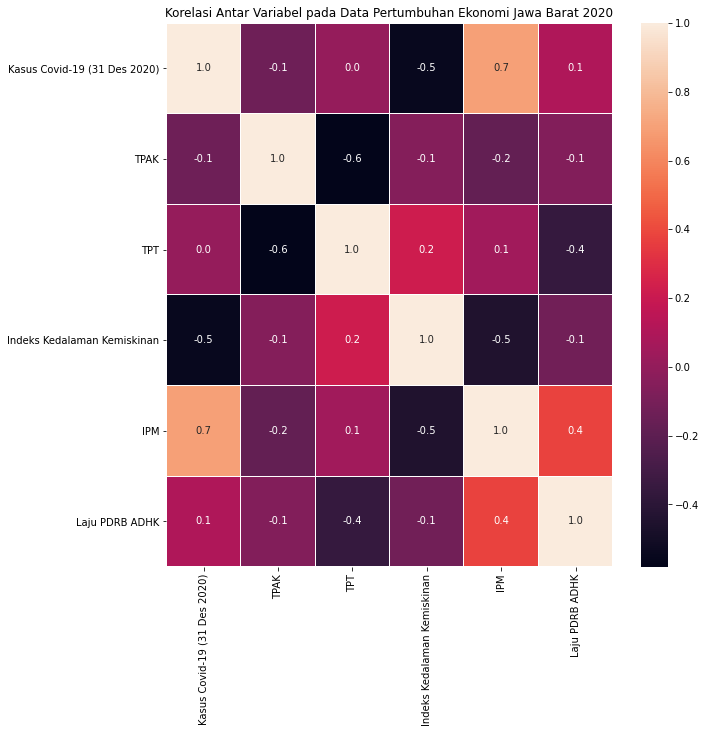

In [57]:
#Grafik Korelasi Antar Variabel
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(korelasi, annot=True, linewidths=.05, fmt= '.1f', ax=ax)
plt.title("Korelasi Antar Variabel pada Data Pertumbuhan Ekonomi Jawa Barat 2020")
plt.show()

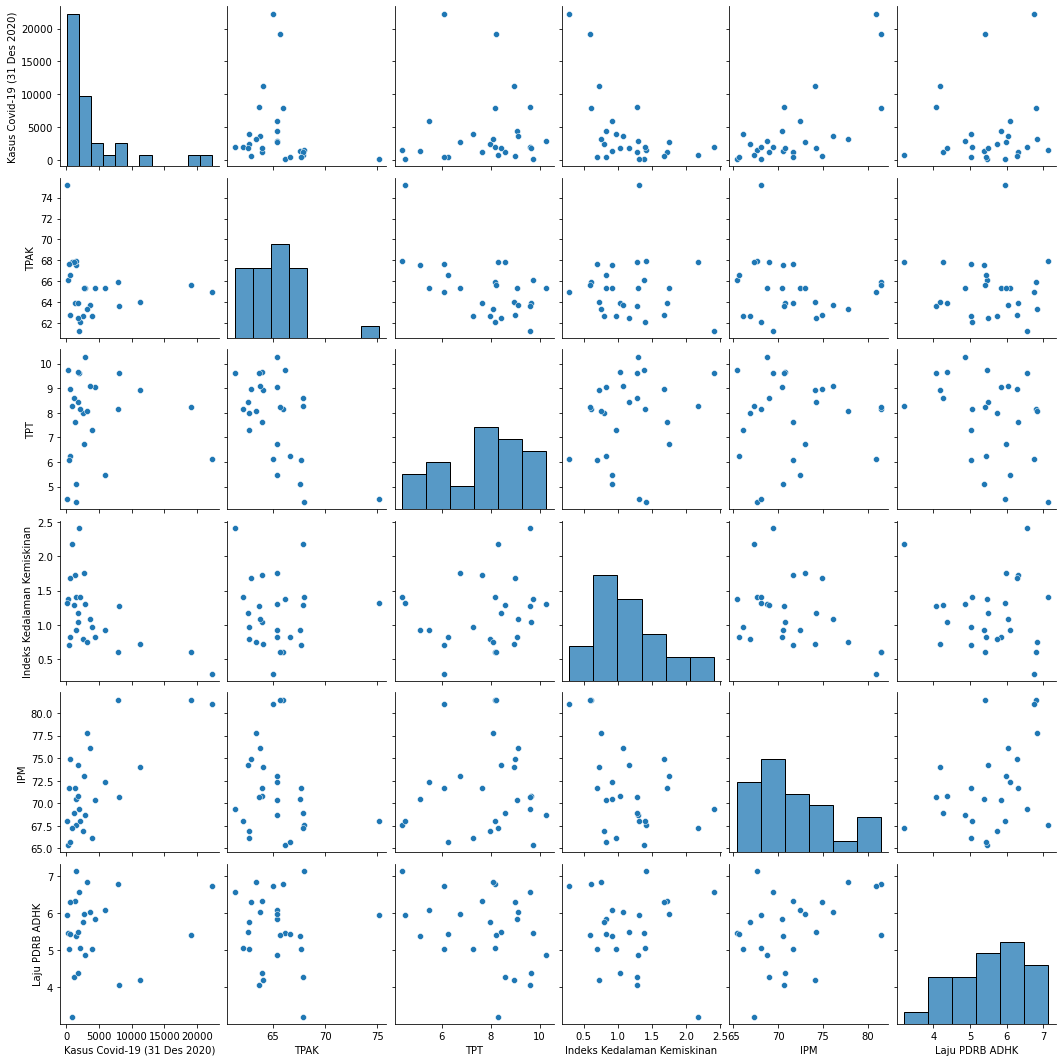

In [58]:
# visualisasi pairplot 
sns.pairplot(data=data,kind='scatter')

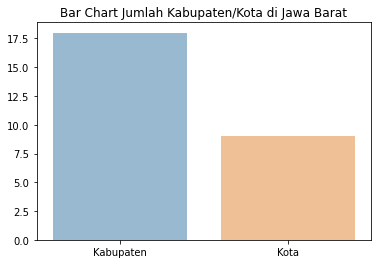

In [59]:
#Visualisasi Barchart Jumlah Kabupaten/Kota
Type = data['Wilayah'].value_counts()

sns.barplot(Type.index, Type.values, alpha=0.5)
plt.title("Bar Chart Jumlah Kabupaten/Kota di Jawa Barat")
plt.show()

Berdasarkan bar chart, bisa dilihat terdapat 18 Kabupaten dan 8 kota di Provinsi Jawa Barat

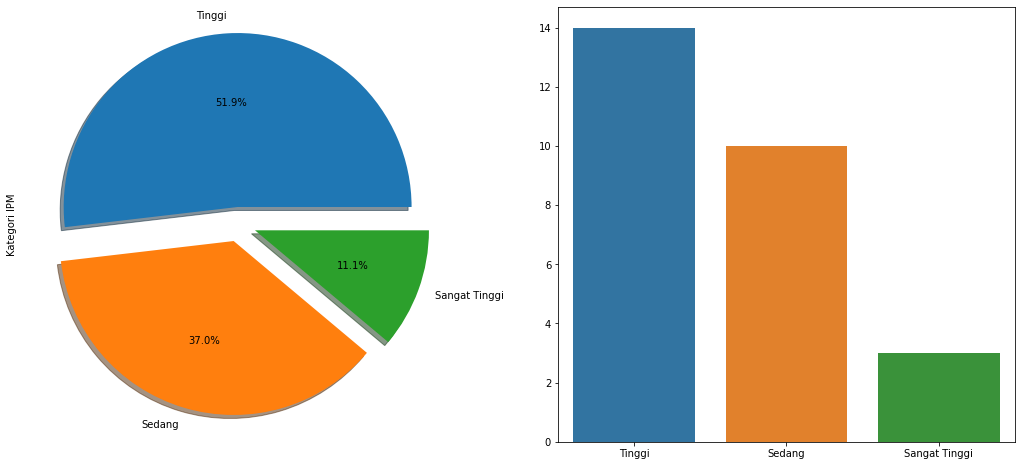

In [60]:
#Visualisasi Pie Chart dan Barchart Kategori IPM
f,ax=plt.subplots(1,2,figsize=(18,8))
data['Kategori IPM'].value_counts().plot.pie(explode=[0.1,0.1,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].plot('Kategori IPM')
ax[0].plot('Count')
sns.barplot(data['Kategori IPM'].value_counts().index, data['Kategori IPM'].value_counts().values, alpha=1)
ax[0].plot('Kategori IPM')
ax[0].plot('Count')

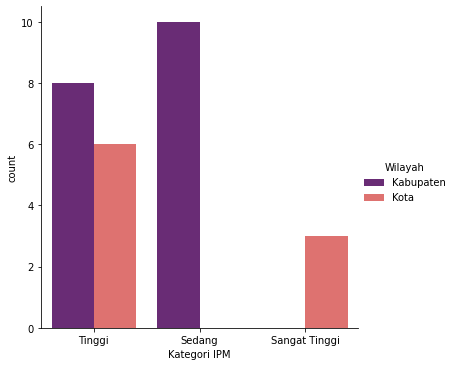

In [61]:
#Visualisasi Bar Chart Kategori IPM Berdasarkan Wilayah
sns.catplot(x="Kategori IPM", kind="count",hue = 'Wilayah', palette="magma", data=data)

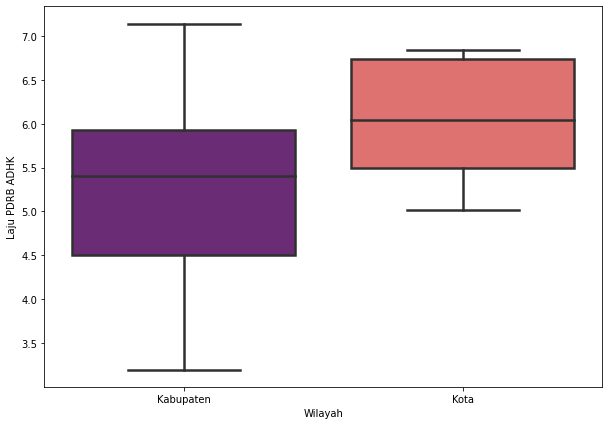

In [62]:
# visualisasi Boxplot Laju PDRB ADHK yang di kelompokkan berdasarkan "Wilayah"
fig=plt.gcf()
fig.set_size_inches(10,7)
fig=sns.boxplot(x='Wilayah',y='Laju PDRB ADHK',data=data,order=['Kabupaten','Kota'],linewidth=2.5,orient="v", palette = 'magma',dodge=False)

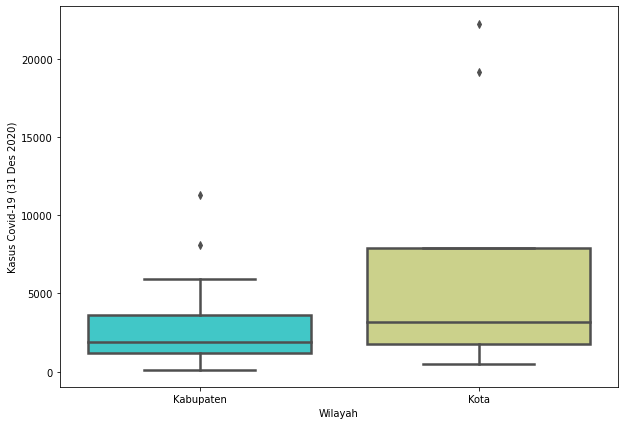

In [63]:
# visualisasi Boxplot Kasus Covid-19 (31 Des 2020) yang di kelompokkan berdasarkan "Wilayah"
fig=plt.gcf()
fig.set_size_inches(10,7)
fig=sns.boxplot(x='Wilayah',y='Kasus Covid-19 (31 Des 2020)',data=data,order=['Kabupaten','Kota'],linewidth=2.5,orient="v", palette = 'rainbow',dodge=False)

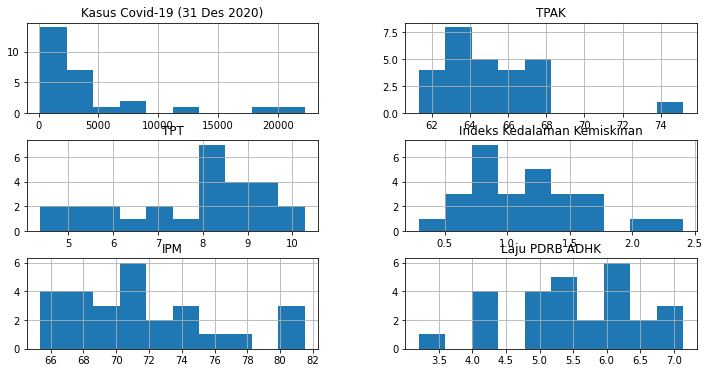

In [64]:
#Visualisasi Distribution Plot Setiap Variabel
data.hist(linewidth=2)
fig=plt.gcf()
fig.set_size_inches(12,6)

<AxesSubplot:xlabel='Laju PDRB ADHK', ylabel='Density'>

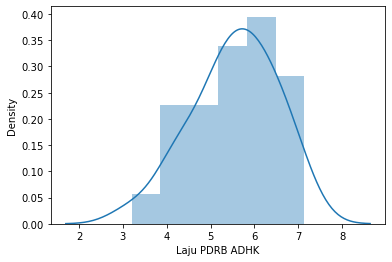

In [65]:
sns.distplot(data['Laju PDRB ADHK'])

In [66]:
#Mengidentifikasi Variabel Prediktor dan Variabel Respon
#Variabel Prediktor --> Kasus Covid-19 (31 Des 2020),TPAK,TPT,Indeks Kedalaman Kemiskinan,IPM
x = data[['Kasus Covid-19 (31 Des 2020)', 'TPAK','TPT','Indeks Kedalaman Kemiskinan','IPM']]

#Variabel Respon --> Laju PDRB ADHK
y = data['Laju PDRB ADHK']

display(x)
display(y)

,Kasus Covid-19 (31 Des 2020),TPAK,TPT,Indeks Kedalaman Kemiskinan,IPM
0,4428,65.42,9.06,0.83,70.40
1,2486,62.68,7.99,0.80,66.88
2,209,66.14,9.72,1.38,65.36
3,5944,65.38,5.48,0.92,72.39
4,3893,62.70,7.28,0.97,66.12
5,499,66.66,6.25,0.83,65.67
6,1415,67.56,5.10,0.92,70.49
7,1936,61.31,9.61,2.41,69.38
8,2844,65.38,10.28,1.30,68.75
9,1514,67.97,4.37,1.41,67.59


0     5.85
1     5.75
2     5.47
3     6.09
4     5.02
5     5.43
6     5.38
7     6.56
8     4.86
9     7.14
10    6.32
11    3.20
12    4.27
13    4.38
14    4.06
15    4.18
16    5.05
17    5.96
18    6.04
19    5.49
20    6.79
21    6.29
22    5.41
23    6.74
24    6.84
25    5.97
26    5.02
Name: Laju PDRB ADHK, dtype: float64

In [96]:
#Split Data menjadi Data Training dan Data Testing (Train Size=0,7 ; Test Size=0,3 ; Random State=1100)
x_train,x_test,y_train,y_test = train_test_split(x, y, train_size = 0.7, test_size = 0.3, random_state =1100)

In [112]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score

def cross_val(model):
    pred = cross_val_score(model, x, y, cv=10)
    return pred.mean()

def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    print('__________________________________')
    
def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square

In [97]:
#Membuat object variabel Linear regression
regressor = LinearRegression()

In [98]:
#Training the Model menggunakan training data yang sudah displit sebelumnya
regressor.fit(x_train, y_train)

LinearRegression()

In [99]:
#Menghitung nilai slope/koefisien (m) dan intercept (b),
print(regressor.coef_)
print(regressor.intercept_)

[-1.19014048e-04 -1.14198853e-01 -3.01752596e-01  1.46720593e-01
  1.65047489e-01]
3.6386962361282444


In [ ]:
Maka persamaan garis:
    y = 3.6386962361282444 - 0.000119014048x1 - 0.114198853x2 - 0.301752596x3 + 0.146720593x4

Berdasarkan nilai koefisien dan intercept didapatkan model regresi yaitu

In [100]:
# Menghitung accuracy score dari model regresi menggunakan testing data yang sudah displit sebelumnya
regressor.score(x_test,y_test)

-0.9028489753429956

In [101]:
print('Correlation: ', math.fabs(regressor.score(x_test,y_test)))

Correlation:  0.9028489753429956


In [113]:
#Memprediksi hasil Test set
y_pred = regressor.predict(x_test)

In [115]:
test_pred = regressor.predict(x_test)
train_pred =  regressor.predict(x_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 0.8384741232052432
MSE: 0.9581948713096937
RMSE: 0.9788742877968006
R2 Square -0.9028489753429956
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.5602860596431716
MSE: 0.47319534631337273
RMSE: 0.6878919583142201
R2 Square 0.49432335733975064
__________________________________


In [116]:
#Evaluasi Data Testing
results_df = pd.DataFrame(data=[["Linear Regression", *evaluate(y_test, test_pred) , cross_val(LinearRegression())]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,0.838474,0.958195,0.978874,-0.902849,-45.170606
